In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("car_data.csv",low_memory=False)

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df.shape

(804, 12)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [55]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf.columns

Index(['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound',
       'Leather'],
      dtype='object')

In [7]:
a=['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound','Leather']
for i in a:
    iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
    upper_threshold = df[i].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[i].quantile(0.25) - (1.5 * iqr)
    print("{} lower threshold :{} and upper threshold :{}".format(i,lower_threshold, upper_threshold))

Mileage lower threshold :-1260.75 and upper threshold :41097.25
Cylinder lower threshold :1.0 and upper threshold :9.0
Liter lower threshold :-0.1999999999999993 and upper threshold :6.199999999999999
Doors lower threshold :4.0 and upper threshold :4.0
Cruise lower threshold :1.0 and upper threshold :1.0
Sound lower threshold :-1.5 and upper threshold :2.5
Leather lower threshold :-1.5 and upper threshold :2.5


In [13]:
df[df['Mileage']>41097.5]

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
119,32537.186751,41829,Cadillac,Deville,DTS Sedan 4D,Sedan,8,4.6,4,1,1,1
159,52001.994379,42691,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
529,15792.831437,41566,Pontiac,G6,Sedan 4D,Sedan,6,3.5,4,1,1,1
649,22244.876553,50387,SAAB,9_3,Linear Sedan 4D,Sedan,4,2.0,4,1,0,1
679,28777.959695,48991,SAAB,9_3 HO,Arc Conv 2D,Convertible,4,2.0,2,1,1,1


In [58]:
a=['Mileage']
for i in a:
    iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
    upper_threshold = df[i].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[i].quantile(0.25) - (1.5 * iqr)
    df[i]=df[i].clip(lower_threshold, upper_threshold)

In [59]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19807.086132,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8119.836852,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,41097.250000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(804, 12)

# EDA

### 1.Mileage

number of miles the car has been driven

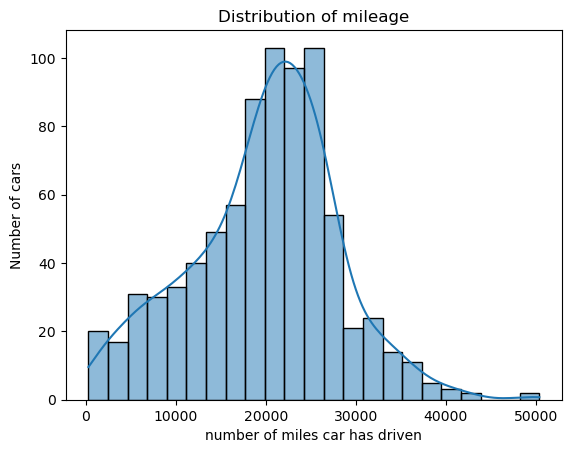

In [401]:
sns.histplot(df, x = "Mileage", kde = True); #using seaborn
plt.xlabel("number of miles car has driven");
plt.ylabel("Number of cars")
plt.title("Distribution of mileage");

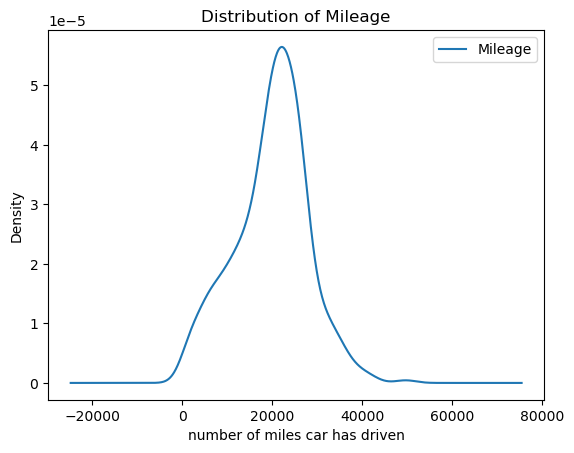

In [396]:
df["Mileage"].plot(kind='kde',legend=True,title='Distribution of Mileage');  #using pandas plot
plt.xlabel("number of miles car has driven");

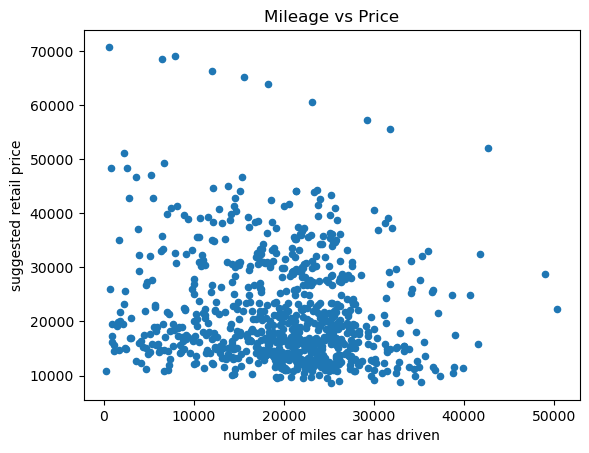

In [26]:
df.plot(x="Mileage",y="Price",kind="scatter",title="Mileage vs Price",xlabel="number of miles car has driven",ylabel="suggested retail price");

In [32]:
df[['Mileage', 'Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


conclusion:There is no correlation between Mileage and price. It means number of miles car driven will have no impact on Price.

### 2.Cylinder

In [78]:
df['Cylinder'].value_counts()

4    394
6    310
8    100
Name: Cylinder, dtype: int64

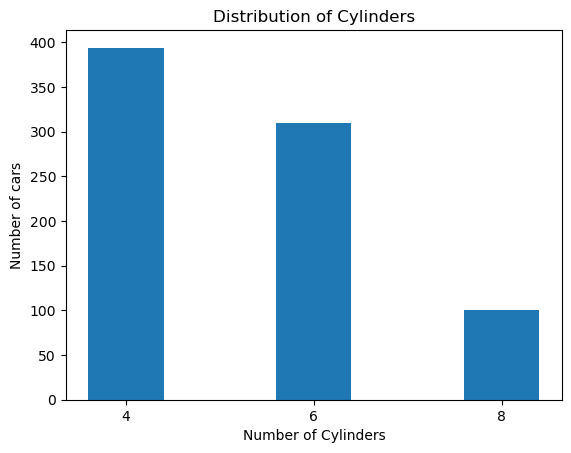

In [402]:
labels, counts = np.unique(df['Cylinder'], return_counts=True);
plt.bar(labels, counts, align='center');
plt.xlabel("Number of Cylinders")
plt.ylabel("Number of cars");
plt.title("Distribution of Cylinders");
plt.gca().set_xticks(labels);

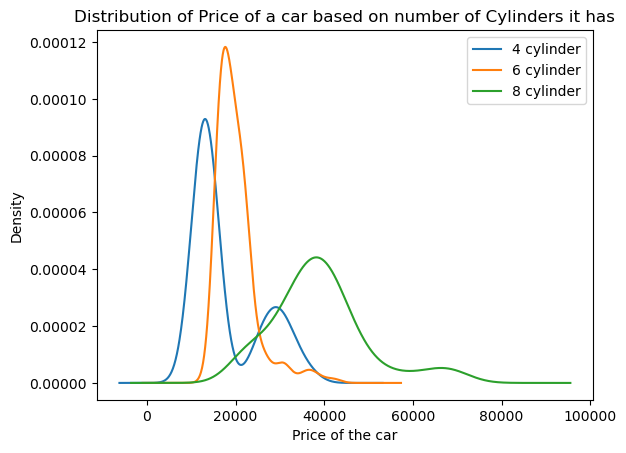

In [419]:
df.groupby("Cylinder")["Price"].plot(kind='kde',legend=True,title="Distribution of Price of a car based on number of Cylinders it has");
plt.xlabel("Price of the car");                     #using pandas plot
plt.legend(["4 cylinder", "6 cylinder","8 cylinder"]);

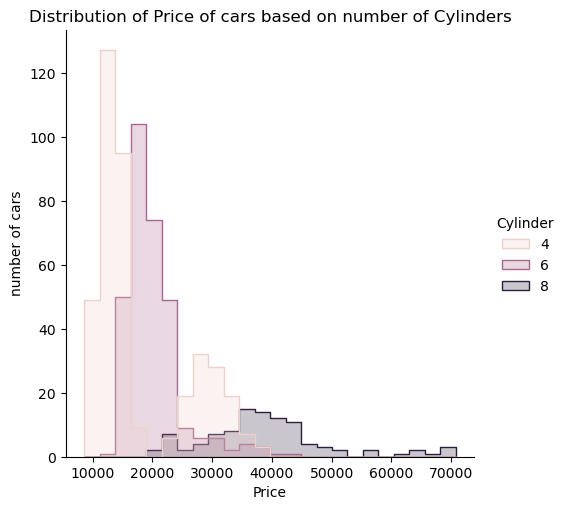

In [423]:
import seaborn as sns                                                         #using seaborn
sns.displot(df,x="Price",hue="Cylinder",element="step",kind="hist")
plt.title("Distribution of Price of cars based on number of Cylinders");
plt.ylabel("number of cars");

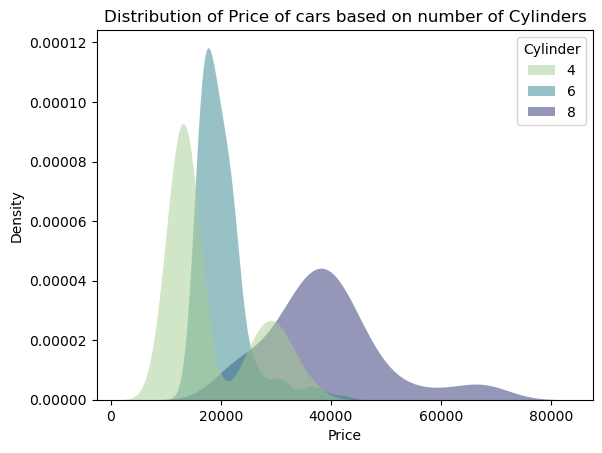

In [420]:
sns.kdeplot(data=df, x="Price", hue="Cylinder",fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0);
plt.title("Distribution of Price of cars based on number of Cylinders"); #using seaborn

In [381]:
df[['Cylinder','Price']].corr()

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


There is Positive correlation between Cylinder and Price.It means Car with Highest Cylinder tend to be more expensive

### 3.Liter 

a more specific measure of engine size

In [103]:
df['Liter'].value_counts()

2.2    190
3.8    160
3.5     80
4.6     60
1.6     60
2.0     60
2.3     50
3.6     30
1.8     30
5.7     20
6.0     20
3.1     10
2.8     10
3.4     10
3.0     10
2.5      4
Name: Liter, dtype: int64

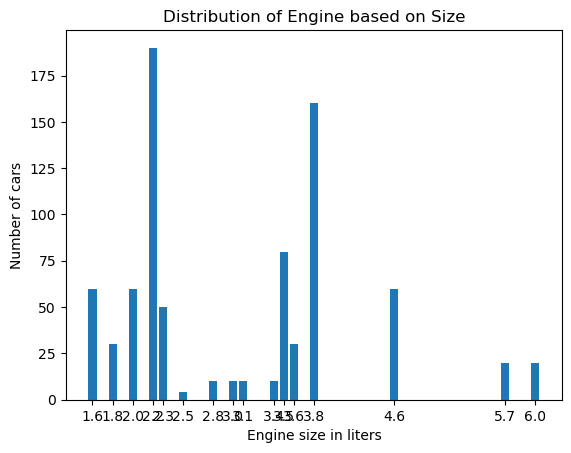

In [172]:
labels, counts = np.unique(df['Liter'], return_counts=True);
plt.bar(labels, counts,width=0.08, align='center');
plt.xlabel("Engine size in liters")
plt.ylabel("Number of cars")
plt.title("Distribution of Engine based on Size")
plt.gca().set_xticks(labels);

In [183]:
df.groupby("Liter")["Price"].mean()

Liter
1.6    10752.833305
1.8    15881.386094
2.0    29968.972727
2.2    13441.277078
2.3    29288.283553
2.5    24960.948265
2.8    30455.144774
3.0    16550.926211
3.1    15989.528107
3.4    16238.093335
3.5    17788.263153
3.6    26150.134403
3.8    20158.316888
4.6    39535.972594
5.7    37076.585744
6.0    39155.712375
Name: Price, dtype: float64

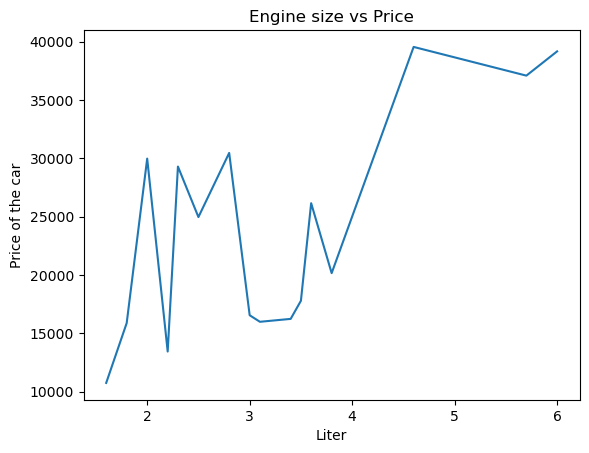

In [185]:
df.groupby("Liter")["Price"].mean().plot(ylabel="Price of the car",title="Engine size vs Price");

In [142]:
df[['Liter','Price']].corr()

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


There is positive correlation between 'Liter' and 'Price'.It means as the higher the Engine size higher the price of the car.

### 4.Doors

In [144]:
df['Doors'].value_counts()

4    614
2    190
Name: Doors, dtype: int64

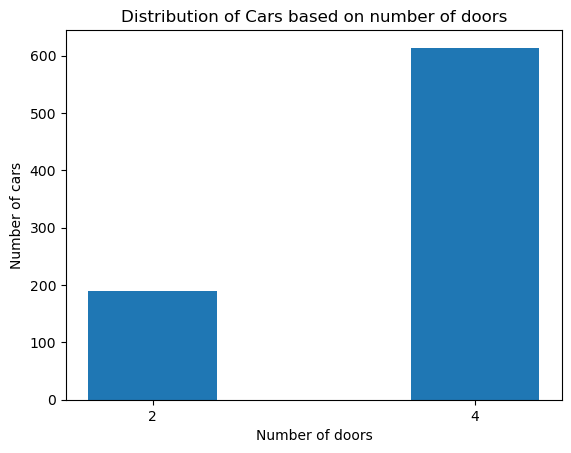

In [222]:
labels,count=np.unique(df['Doors'],return_counts=True)
plt.bar(labels,count);
plt.xlabel("Number of doors");
plt.ylabel("Number of cars");
plt.title("Distribution of Cars based on number of doors");
plt.gca().set_xticks(labels);

In [182]:
df.groupby("Doors")["Price"].mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

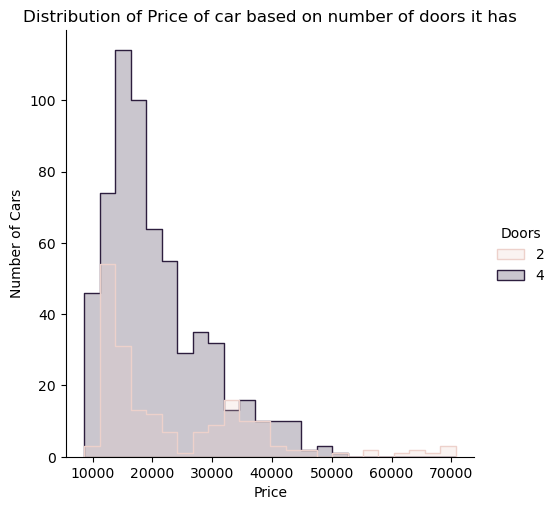

In [424]:
import seaborn as sns                                                         #using seaborn
sns.displot(df,x="Price",hue="Doors",element="step",kind="hist")
plt.title("Distribution of Price of car based on number of doors it has");
plt.ylabel("Number of Cars");

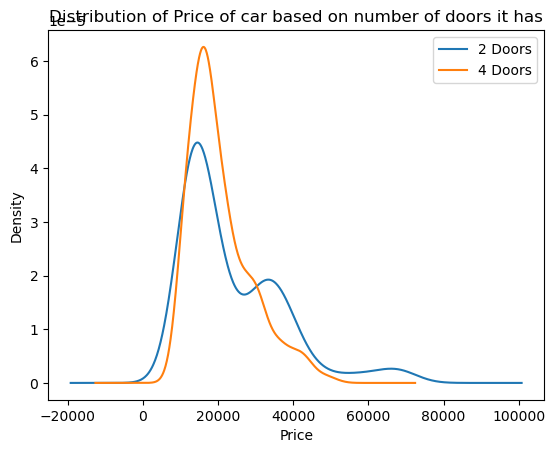

In [177]:
df.groupby("Doors")["Price"].plot(kind='kde',legend=True,title="Distribution of Price of car based on number of doors it has");
plt.legend(["2 Doors","4 Doors"])
plt.xlabel("Price");

In [178]:
df[['Doors','Price']].corr()

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


There is no correlation between the doors and the price.It means Price of car does not depend on the number of doors it has

### 5.Cruise

indicator variable representing whether the car has cruise control (1 = cruise)

In [186]:
df['Cruise'].value_counts()

1    605
0    199
Name: Cruise, dtype: int64

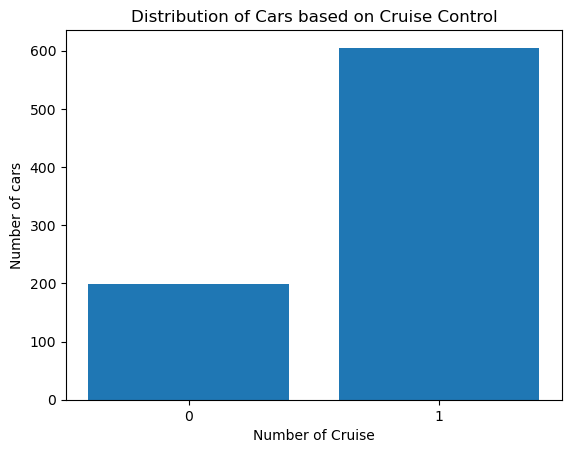

In [221]:
labels,counts=np.unique(df['Cruise'],return_counts=True)
plt.bar(labels,counts);
plt.gca().set_xticks(labels);
plt.xlabel("Number of Cruise");
plt.ylabel("Number of cars");
plt.title("Distribution of Cars based on Cruise Control");

In [212]:
df.groupby('Doors')['Price'].mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

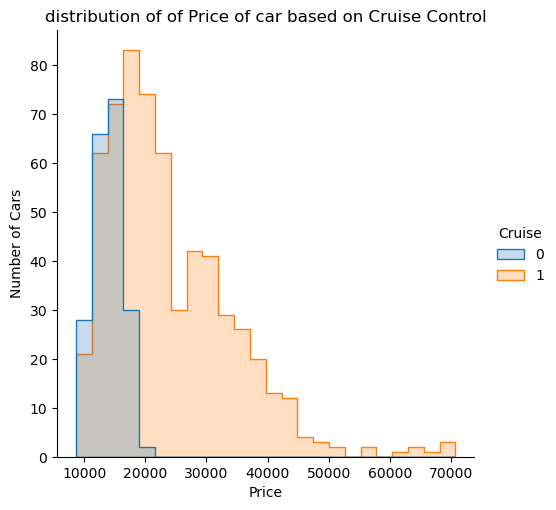

In [425]:
import seaborn as sns                                                         #using seaborn
sns.displot(df,x="Price",hue="Cruise",element="step",kind="hist")
plt.title("distribution of of Price of car based on Cruise Control");
plt.ylabel("Number of Cars");

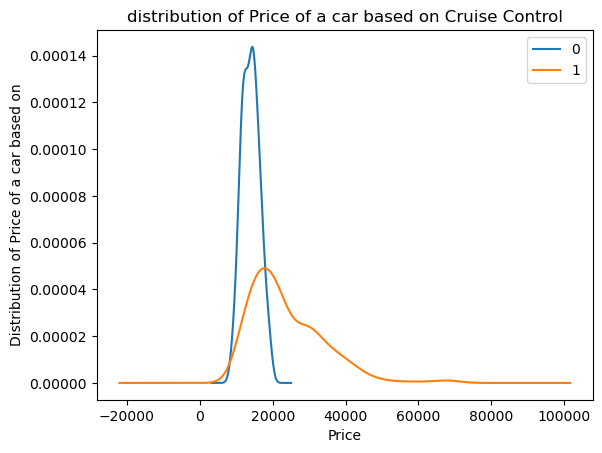

In [414]:
df.groupby('Cruise')['Price'].plot(kind='kde',legend=True,title="distribution of Price of a car based on Cruise Control");
plt.xlabel("Price");
plt.ylabel("Distribution of Price of a car based on");

In [213]:
df[['Cruise','Price']].corr()

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


There is positive correlation between Cruise Control and Price.It means car which has cruise control has higher value

### 6.Sound

 indicator variable representing whether the car has upgraded speakers (1 = upgraded)

In [214]:
df['Sound'].value_counts()

1    546
0    258
Name: Sound, dtype: int64

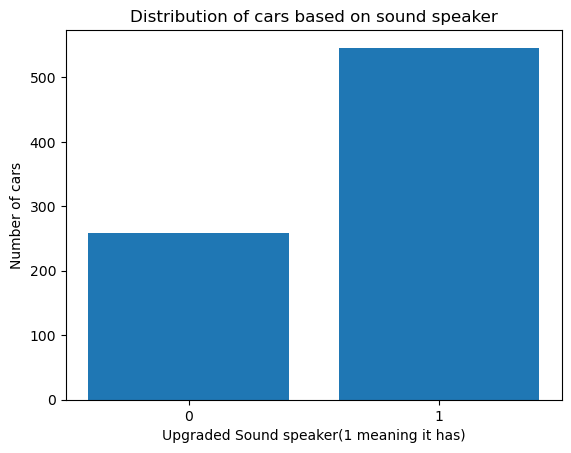

In [223]:
labels,counts=np.unique(df['Sound'],return_counts=True)
plt.bar(labels,counts);
plt.gca().set_xticks(labels);
plt.xlabel("Upgraded Sound speaker(1 meaning it has)");
plt.ylabel("Number of cars");
plt.title("Distribution of cars based on sound speaker");

In [217]:
df.groupby('Sound')['Price'].mean()

Sound
0    23130.144379
1    20498.736885
Name: Price, dtype: float64

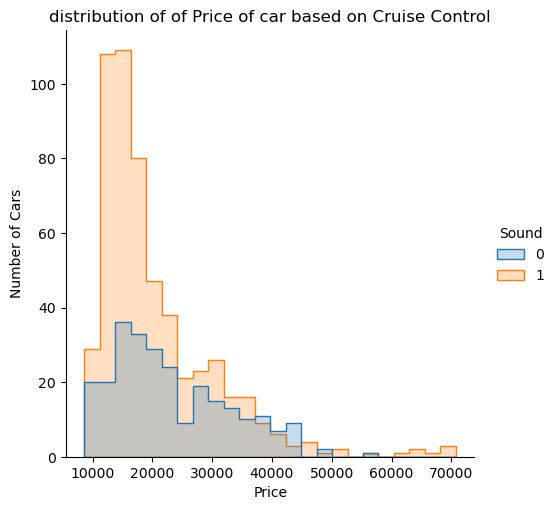

In [426]:
import seaborn as sns                                                         #using seaborn
sns.displot(df,x="Price",hue="Sound",element="step",kind="hist")
plt.title("distribution of of Price of car based on Cruise Control");
plt.ylabel("Number of Cars");

In [219]:
df[['Sound','Price']].corr()

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


There is no correlation between Sound speakers and price.It means Upgraded speakers has no affect on price

### 7.Leather

indicator variable representing whether the car has leather seats (1 = leather)

In [220]:
df['Leather'].value_counts()

1    582
0    222
Name: Leather, dtype: int64

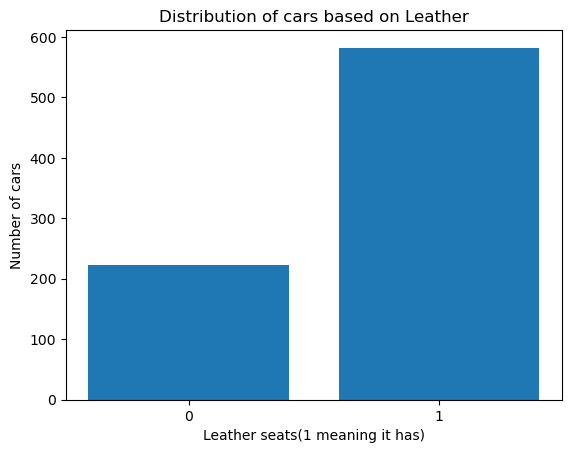

In [224]:
labels,counts=np.unique(df['Leather'],return_counts=True)
plt.bar(labels,counts);
plt.gca().set_xticks(labels);
plt.xlabel("Leather seats(1 meaning it has)");
plt.ylabel("Number of cars");
plt.title("Distribution of cars based on Leather");

In [226]:
df.groupby('Leather')["Price"].mean()

Leather
0    18828.775928
1    22302.232531
Name: Price, dtype: float64

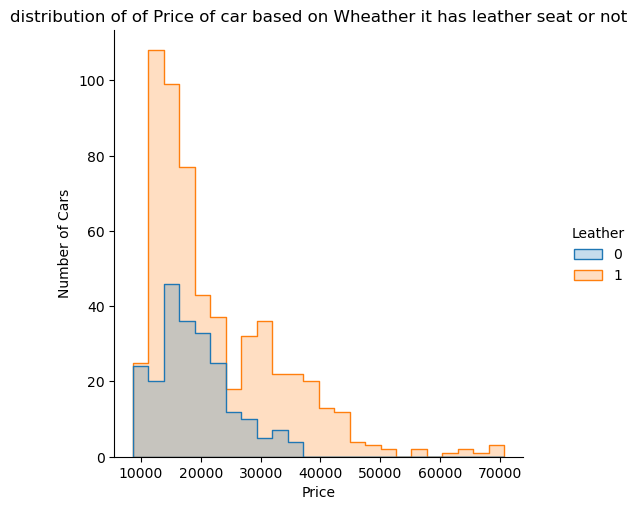

In [427]:
import seaborn as sns                                                         #using seaborn
sns.displot(df,x="Price",hue="Leather",element="step",kind="hist")
plt.title("distribution of of Price of car based on Wheather it has leather seat or not");
plt.ylabel("Number of Cars");

In [232]:
df[['Leather','Price']].corr()

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


There is no correlation between Leather and Price.It means having leather seat does not determine the price car

### 8.Make

In [233]:
df['Make'].value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

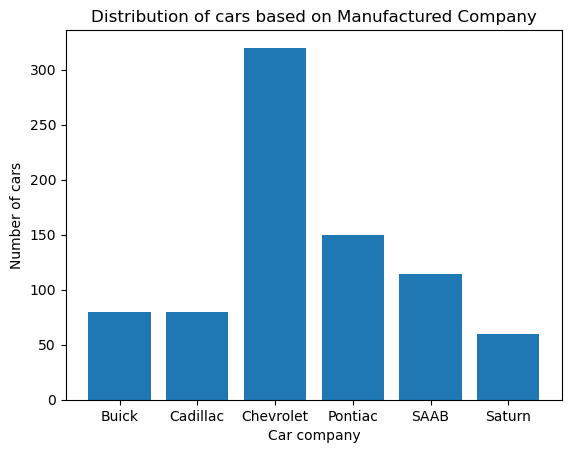

In [235]:
labels,counts=np.unique(df['Make'],return_counts=True)
plt.bar(labels,counts);
plt.gca().set_xticks(labels);
plt.xlabel("Car company");
plt.ylabel("Number of cars");
plt.title("Distribution of cars based on Manufactured Company");

In [236]:
df.groupby('Make')["Price"].mean()

Make
Buick        20815.113883
Cadillac     40936.335448
Chevrolet    16427.599348
Pontiac      18412.100422
SAAB         29494.704687
Saturn       13978.807560
Name: Price, dtype: float64

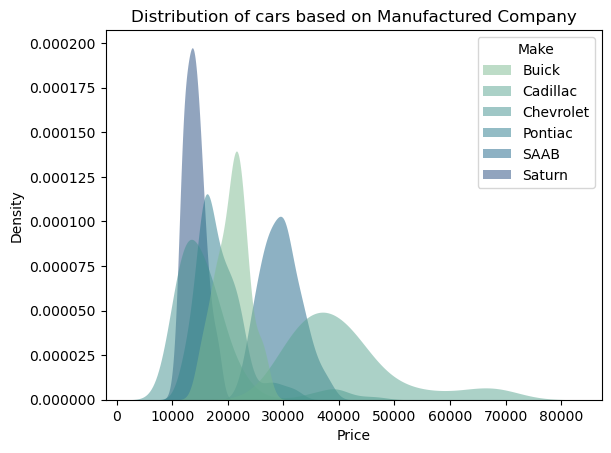

In [257]:
sns.kdeplot(data=df, x="Price", hue="Make",fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0);
plt.title("Distribution of cars based on Manufactured Company");

### 9.Model

In [262]:
df[['Make','Model']].value_counts()

Make       Model      
Chevrolet  Malibu         60
           AVEO           60
           Cavalier       60
Saturn     Ion            50
Chevrolet  Cobalt         50
SAAB       9_3 HO         40
Pontiac    Vibe           30
Chevrolet  Impala         30
Cadillac   Deville        30
SAAB       9_5            30
Pontiac    Bonneville     30
Chevrolet  Monte Carlo    30
Pontiac    Grand Prix     30
Buick      Lacrosse       30
Pontiac    G6             20
Buick      Park Avenue    20
Chevrolet  Corvette       20
Buick      Lesabre        20
SAAB       9_3            20
           9_5 HO         20
Pontiac    Grand Am       20
           Sunfire        10
Buick      Century        10
Pontiac    GTO            10
Chevrolet  Classic        10
Cadillac   XLR-V8         10
           STS-V8         10
           STS-V6         10
           CTS            10
           CST-V          10
Saturn     L Series       10
SAAB       9-2X AWD        4
dtype: int64

### 10.Type

In [263]:
df['Type'].value_counts()

Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: Type, dtype: int64

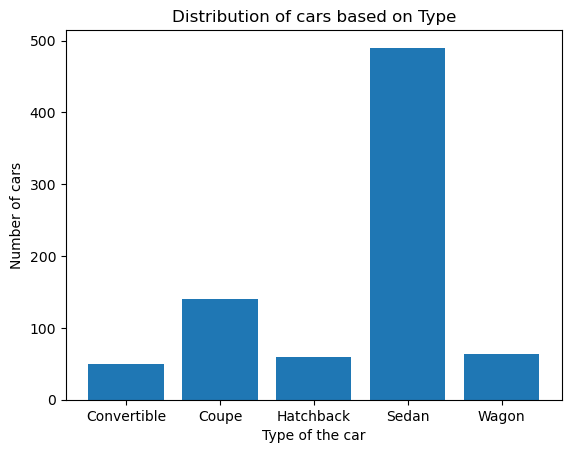

In [265]:
labels,counts=np.unique(df['Type'],return_counts=True)
plt.bar(labels,counts);
plt.gca().set_xticks(labels);
plt.xlabel("Type of the car");
plt.ylabel("Number of cars");
plt.title("Distribution of cars based on Type");

In [266]:
df.groupby('Type')["Price"].mean()

Type
Convertible    40831.705847
Coupe          17726.931831
Hatchback      14170.927809
Sedan          21067.927487
Wagon          22859.245356
Name: Price, dtype: float64

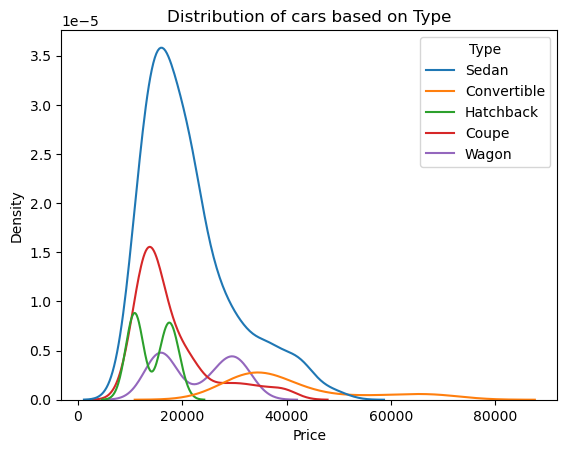

In [269]:
sns.kdeplot(data=df, x="Price", hue="Type");
plt.title("Distribution of cars based on Type");

In [284]:
df.groupby(["Make","Type"])["Price"].mean()

Make       Type       
Buick      Sedan          20815.113883
Cadillac   Convertible    62938.736572
           Sedan          37793.135287
Chevrolet  Convertible    41501.592957
           Coupe          17933.203409
           Hatchback      14170.927809
           Sedan          14859.824290
Pontiac    Coupe          19317.108812
           Sedan          18954.002401
           Wagon          15881.386094
SAAB       Convertible    33239.399902
           Sedan          27573.284345
           Wagon          29016.179999
Saturn     Coupe          14413.444263
           Sedan          13761.489209
Name: Price, dtype: float64

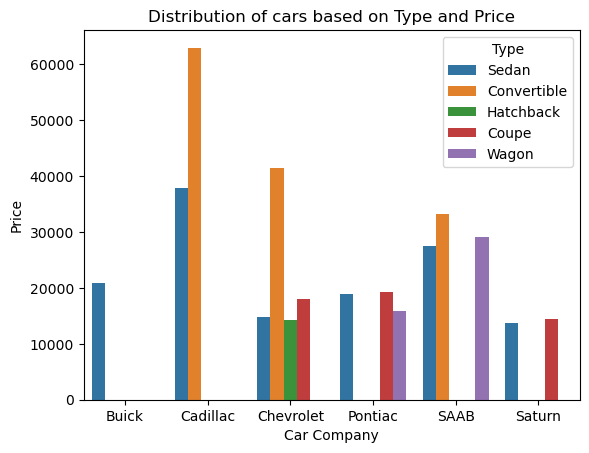

In [289]:
ax=sns.barplot(x = 'Make',y = 'Price',hue = 'Type',data = df,ci = 0)
sns.move_legend(ax, "upper right")
plt.xlabel("Car Company");
plt.title("Distribution of cars based on Type and Price");

### 11.Trim

In [288]:
df['Trim'].value_counts()

Sedan 4D               170
Coupe 2D                50
LS Sedan 4D             50
LT Sedan 4D             30
LS Coupe 2D             30
Quad Coupe 2D           20
SE Sedan 4D             20
Arc Sedan 4D            20
GT Sedan 4D             20
Aero Sedan 4D           20
Linear Wagon 4D         14
SLE Sedan 4D            10
GT Coupe 2D             10
GTP Sedan 4D            10
AWD Sportwagon 4D       10
Linear Conv 2D          10
GT Sportwagon           10
Sportwagon 4D           10
SS Coupe 2D             10
Linear Sedan 4D         10
Aero Conv 2D            10
Arc Conv 2D             10
Arc Wagon 4D            10
Aero Wagon 4D           10
GXP Sedan 4D            10
LT MAXX Hback 4D        10
LT Coupe 2D             10
LS Hatchback 4D         10
CXL Sedan 4D            10
CXS Sedan 4D            10
Custom Sedan 4D         10
Limited Sedan 4D        10
Special Ed Ultra 4D     10
DHS Sedan 4D            10
DTS Sedan 4D            10
Hardtop Conv 2D         10
LT Hatchback 4D         10
M

### Linear regression on Mileage vs Price:

##### Train Test split, Scaling

In [307]:
X = df[['Mileage']].values #array of features
y = df['Price'].values #array of targets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

##### Modelling

In [308]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [309]:
y_pred = regressor.predict(X_test_scaled)

In [311]:
coef=pd.DataFrame(regressor.coef_,["Mileage"],["Coefficients"])
coef

,Coefficients
Mileage,-1466.524182


In [312]:
print("Intercept is",regressor.intercept_)

Intercept is 21055.377663497988


##### Linear Regression equation(y=mx+c)

predicted Price = (-1466.524182)*Scaled_Mileage+ 21055.37

##### Matrics

In [310]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.007411825815131001


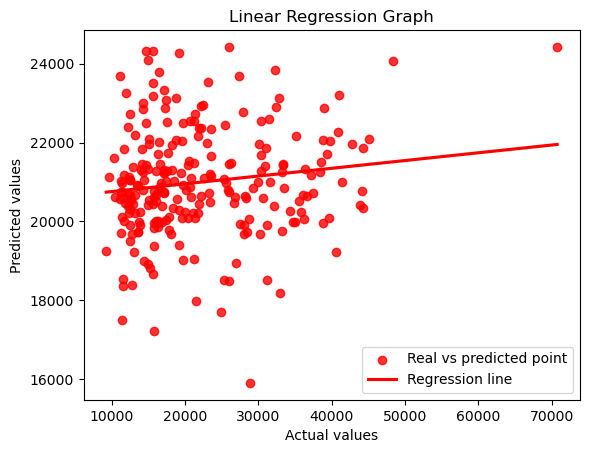

In [314]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(["Real vs predicted point","Regression line"])
plt.title("Linear Regression Graph")
plt.show()

### Linear regression on mileage, cylinders, liters, doors, cruise, sound, and leather vs Price

##### Train Test split and Scaling

In [335]:
X = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound','Leather']].values #array of features
y = df['Price'].values #array of targets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

##### Modelling

In [336]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [337]:
y_pred = regressor.predict(X_test_scaled)

In [338]:
coef=pd.DataFrame(regressor.coef_,[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound','Leather']],["Coefficients"])
coef

,Coefficients
Mileage,-1663.808357
Cylinder,4244.046711
Liter,27.862788
Doors,-1179.090766
Cruise,2599.533537
Sound,-1074.049172
Leather,1426.301983


##### Linear Regression equation(y=mx+c)

Predicted Price = (-1351.30*Scaled_mileage)+ (4076.47*Scaled_Cylinder) - (110.72*Scaled_Liter)-(711.57*Scaled_Doors)+(2706.36*Scaled_Cruise)-(1016.50*Scaled_Sound)+(1192.73*Scaled_Leather)

##### Matrics

In [339]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.4208550322222475


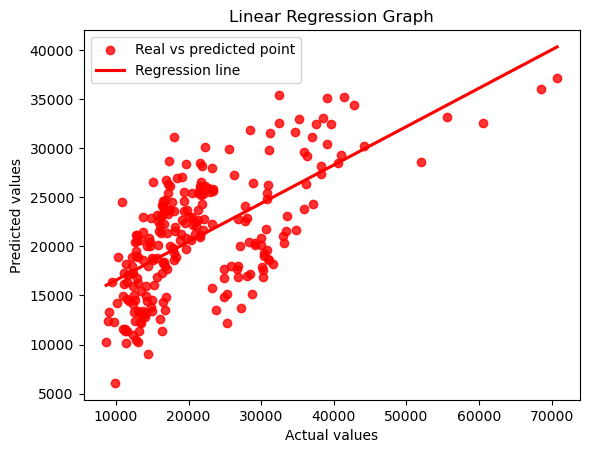

In [340]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(["Real vs predicted point","Regression line"])
plt.title("Linear Regression Graph")
plt.show()

##### Trying to find Best combination of ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound','Leather'] to predict price

In [342]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [84]:
a=pd.get_dummies(df)
a.shape

(804, 98)

In [388]:
import itertools
numbers = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound','Leather']
combinations = []
for r in range(len(numbers)+1):
    for combination in itertools.combinations(numbers, r):
        combinations.append(combination)
combinations

[(),
 ('Mileage',),
 ('Cylinder',),
 ('Liter',),
 ('Doors',),
 ('Cruise',),
 ('Sound',),
 ('Leather',),
 ('Mileage', 'Cylinder'),
 ('Mileage', 'Liter'),
 ('Mileage', 'Doors'),
 ('Mileage', 'Cruise'),
 ('Mileage', 'Sound'),
 ('Mileage', 'Leather'),
 ('Cylinder', 'Liter'),
 ('Cylinder', 'Doors'),
 ('Cylinder', 'Cruise'),
 ('Cylinder', 'Sound'),
 ('Cylinder', 'Leather'),
 ('Liter', 'Doors'),
 ('Liter', 'Cruise'),
 ('Liter', 'Sound'),
 ('Liter', 'Leather'),
 ('Doors', 'Cruise'),
 ('Doors', 'Sound'),
 ('Doors', 'Leather'),
 ('Cruise', 'Sound'),
 ('Cruise', 'Leather'),
 ('Sound', 'Leather'),
 ('Mileage', 'Cylinder', 'Liter'),
 ('Mileage', 'Cylinder', 'Doors'),
 ('Mileage', 'Cylinder', 'Cruise'),
 ('Mileage', 'Cylinder', 'Sound'),
 ('Mileage', 'Cylinder', 'Leather'),
 ('Mileage', 'Liter', 'Doors'),
 ('Mileage', 'Liter', 'Cruise'),
 ('Mileage', 'Liter', 'Sound'),
 ('Mileage', 'Liter', 'Leather'),
 ('Mileage', 'Doors', 'Cruise'),
 ('Mileage', 'Doors', 'Sound'),
 ('Mileage', 'Doors', 'Leather'),

In [389]:
del combinations[0] #deleting first empty combination

In [390]:
len(combinations)

127

In [391]:
for j in range(127):
    a=[i for i in combinations[j]]
    print(a)

['Mileage']
['Cylinder']
['Liter']
['Doors']
['Cruise']
['Sound']
['Leather']
['Mileage', 'Cylinder']
['Mileage', 'Liter']
['Mileage', 'Doors']
['Mileage', 'Cruise']
['Mileage', 'Sound']
['Mileage', 'Leather']
['Cylinder', 'Liter']
['Cylinder', 'Doors']
['Cylinder', 'Cruise']
['Cylinder', 'Sound']
['Cylinder', 'Leather']
['Liter', 'Doors']
['Liter', 'Cruise']
['Liter', 'Sound']
['Liter', 'Leather']
['Doors', 'Cruise']
['Doors', 'Sound']
['Doors', 'Leather']
['Cruise', 'Sound']
['Cruise', 'Leather']
['Sound', 'Leather']
['Mileage', 'Cylinder', 'Liter']
['Mileage', 'Cylinder', 'Doors']
['Mileage', 'Cylinder', 'Cruise']
['Mileage', 'Cylinder', 'Sound']
['Mileage', 'Cylinder', 'Leather']
['Mileage', 'Liter', 'Doors']
['Mileage', 'Liter', 'Cruise']
['Mileage', 'Liter', 'Sound']
['Mileage', 'Liter', 'Leather']
['Mileage', 'Doors', 'Cruise']
['Mileage', 'Doors', 'Sound']
['Mileage', 'Doors', 'Leather']
['Mileage', 'Cruise', 'Sound']
['Mileage', 'Cruise', 'Leather']
['Mileage', 'Sound', 'Leath

In [392]:
d=[]
for j in range(127):
    a=[i for i in combinations[j]]
    X = df[a].values #array of features
    y = df['Price'].values #array of targets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=46)
    from sklearn.preprocessing import StandardScaler ## standrard scalig 
    scaler = StandardScaler() #initialise to a variable
    scaler.fit(X_train) # we are finding the values of mean and sd from the td
    X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
    X_test_scaled = scaler.transform(X_test) # transform the test data 
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train_scaled, y_train)
    #print(X_test_scaled)
    #print("***")
    y_pred = regressor.predict(X_test_scaled)
    print(f'R2- SCORE for combination {j}:', metrics.r2_score(y_test,y_pred))
    d.append(metrics.r2_score(y_test,y_pred))

print("*******")
print("best combination to predict Price : ",combinations[d.index(max(d))],"with score",max(d))

R2- SCORE for combination 0: -0.020798124496407056
R2- SCORE for combination 1: 0.347974983601138
R2- SCORE for combination 2: 0.31531216065784706
R2- SCORE for combination 3: 0.017655610995797932
R2- SCORE for combination 4: 0.1938695852560316
R2- SCORE for combination 5: 0.0016253074324195094
R2- SCORE for combination 6: 0.002731150571499974
R2- SCORE for combination 7: 0.34286397459430906
R2- SCORE for combination 8: 0.3111460848808927
R2- SCORE for combination 9: -0.004231229551915794
R2- SCORE for combination 10: 0.19043001609758547
R2- SCORE for combination 11: -0.011448400297482397
R2- SCORE for combination 12: -0.02303212524220455
R2- SCORE for combination 13: 0.34055194463921545
R2- SCORE for combination 14: 0.37226723393047145
R2- SCORE for combination 15: 0.3938589691521255
R2- SCORE for combination 16: 0.351689471255605
R2- SCORE for combination 17: 0.3580150769271201
R2- SCORE for combination 18: 0.3291544227011485
R2- SCORE for combination 19: 0.36646279549198923
R2- SCOR

### Linear Regression using make, model, and body type against Price

In [126]:
a=df[['Make','Model','Type','Price']]

In [371]:
import itertools
numbers = ['Make','Model','Type']
combinations = []
for r in range(len(numbers)+1):
    for combination in itertools.combinations(numbers, r):
        combinations.append(combination)
combinations

[(),
 ('Make',),
 ('Model',),
 ('Type',),
 ('Make', 'Model'),
 ('Make', 'Type'),
 ('Model', 'Type'),
 ('Make', 'Model', 'Type')]

In [372]:
del combinations[0]

In [373]:
len(combinations)

7

In [386]:
d=[]
for j in range(len(combinations)):
    a=[i for i in combinations[j]]
    a.append('Price')             #append column name 'Price'
    g=df[a]                        #create a new dataframe using column name in 'list a'
    b=pd.get_dummies(g)            #create dummy variables for categorical variables data
    s=[i for i in b.columns]       #get the column names in new 'list s'
    s.remove("Price")               #remove 'Price' from that 'list s'
    X = b[s].values                 #get values of dataframe using columns name in 'list s' and assigned it for 'X'
    y = b['Price'].values           #get target values from column 'Price'
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=565)
    from sklearn.preprocessing import StandardScaler ## standrard scalig 
    scaler = StandardScaler() #initialise to a variable
    scaler.fit(X_train) # we are finding the values of mean and sd from the td
    X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
    X_test_scaled = scaler.transform(X_test) # transform the test data 
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train_scaled, y_train)
    #print(X_test_scaled)
    #print("***")
    y_pred = regressor.predict(X_test_scaled)
    print(f'R2- SCORE for combination {j}:', metrics.r2_score(y_test,y_pred))
    d.append(metrics.r2_score(y_test,y_pred))

print("*******")
print("best combination to Predict Price is: ",combinations[d.index(max(d))],"with R-2 score ",max(d))

R2- SCORE for combination 0: 0.6741823814205675
R2- SCORE for combination 1: 0.9547773183514974
R2- SCORE for combination 2: 0.2631793151345554
R2- SCORE for combination 3: 0.9553809353935467
R2- SCORE for combination 4: 0.7502980914182286
R2- SCORE for combination 5: 0.9594741917474098
R2- SCORE for combination 6: 0.9603536125528311
*******
best combination to Predict Price is:  ('Make', 'Model', 'Type') with score 0.9603536125528311
